In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import sklearn
import re
import matplotlib.pyplot as plt

In [2]:
# Upload file, convert to dataframe
students_df = pd.read_csv('../CSP_Data/student_demographic.csv')
students_df

,Agency ID,Person ID,Person Type,Registration,Status,Date of Birth,Housing Status,Street Address,Apt./Unit,City,...,Sexual Orientation/Sexual Identity Specify,Educational Attainment,School Attending,Specify School Attending,SFUSD record? (y/n),School Entry Date,SFUSD Entry Date,K-12 Grade Level (FY18-19),K-12 Grade Level (FY19-20),Agency Enrollment Date
0,97393,46846158,Youth,Complete,Active,9/14/2003,Permanent/Stable Housing,591 Flood Ave,NaN,San Francisco,...,NaN,Currently attending K-12,Mission HS,NaN,SFUSD,8/20/2018,2/10/2011,10,11,5/14/2019 12:13
1,97393,46857740,Youth,Complete,Active,4/15/2003,Permanent/Stable Housing,1153 Scott St,NaN,San Francisco,...,NaN,Currently attending K-12,Mission HS,NaN,SFUSD,8/20/2018,8/25/2008,10,11,10/2/2018 13:09
2,97393,47821880,Youth,Complete,Active,6/27/2002,Permanent/Stable Housing,145 Taylor St Apt 302,NaN,San Francisco,...,NaN,Currently attending K-12,Mission HS,NaN,SFUSD,1/17/2019,1/17/2019,9,10,2/11/2020 10:41
3,97393,46893469,Youth,Complete,Active,9/2/2006,Permanent/Stable Housing,1532 Pershing Dr Apt D,NaN,San Francisco,...,NaN,Currently attending K-12,Marina MS,NaN,SFUSD,8/20/2018,7/21/2017,6,7,11/16/2018 13:41
4,97393,46844453,Youth,Complete,Active,8/3/2004,Permanent/Stable Housing,144 10th Ave,NaN,San Francisco,...,NaN,Currently attending K-12,"New SFUSD, EPC",NaN,SFUSD,8/20/2018,8/24/2009,9,10,2/19/2020 14:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,97393,46858120,Youth,Complete,Active,3/29/2004,Permanent/Stable Housing,1410 Sacramento St,NaN,San Francisco,...,NaN,Currently attending K-12,Lowell HS,NaN,SFUSD,8/20/2018,8/24/2009,9,10,10/2/2018 9:27
311,97393,48846586,Youth,Complete,Active,5/22/2003,Permanent/Stable Housing,131 Victoria St,NaN,San Francisco,...,NaN,NaN,NaN,NaN,SFUSD,NaN,NaN,NaN,11,2/14/2020 10:10
312,97393,46863569,Youth,Complete,Active,9/27/2003,Permanent/Stable Housing,336 Wayland St,NaN,San Francisco,...,NaN,Currently attending K-12,Burton (Phillip and Sala) HS,NaN,SFUSD,8/20/2018,8/25/2008,10,11,2/12/2020 10:15
313,97393,46863548,Youth,Complete,Active,7/30/2003,Permanent/Stable Housing,1340 Sunnydale Ave,NaN,San Francisco,...,NaN,Currently attending K-12,Burton (Phillip and Sala) HS,NaN,SFUSD,8/20/2018,8/25/2008,10,11,2/12/2020 10:16


In [3]:
# Columns and data types
students_df.dtypes

Agency ID                                       int64
Person ID                                       int64
Person Type                                    object
Registration                                   object
Status                                         object
Date of Birth                                  object
Housing Status                                 object
Street Address                                 object
Apt./Unit                                     float64
City                                           object
State                                          object
Zip                                             int64
Race/Ethnicity                                 object
Specify Ethnicity                              object
Home Language                                  object
Specify Language                               object
Gender                                         object
Gay/Lesbian/Bisexual                           object
Sex at Birth                

In [4]:
# Check if gender and gender identity have the same information profile
students_df['Gender'].value_counts()

Male                   159
Female                 141
Declined/Not Stated     13
Transgender              2
Name: Gender, dtype: int64

In [5]:
students_df['Gender Identity'].value_counts()

Male                   159
Female                 141
Declined/Not Stated     13
Transgender              2
Name: Gender Identity, dtype: int64

In [6]:
# Drop Uneccesary columns in Student Demographics
students_df = students_df.drop(columns=['Agency ID','Person Type','Gender Identity','Registration','Specify Language','Street Address','Apt./Unit','State','Specify Ethnicity','SFUSD record? (y/n)', 'Status','Specify School Attending','Gender Identity Specify','Sexual Orientation/Sexual Identity Specify', 'Sexual Orientation/Sexual Identity', 'Gay/Lesbian/Bisexual', 'Educational Attainment','Sex at Birth'])

In [7]:
students_df.columns

Index(['Person ID', 'Date of Birth', 'Housing Status', 'City', 'Zip',
       'Race/Ethnicity', 'Home Language', 'Gender', 'School Attending',
       'School Entry Date', 'SFUSD Entry Date', 'K-12 Grade Level (FY18-19)',
       'K-12 Grade Level (FY19-20)', 'Agency Enrollment Date'],
      dtype='object')

In [8]:
# Change Zip to Home Zip Codes

students_df= students_df.rename(columns={'Person ID':'Participant ID', 'Date of Birth':'Date of Birth', 'Housing Status': 'Housing Status', 'City':'City', 'Zip':'Home Zip Code',
       'Race/Ethnicity':'Race/Ethnicity', 'Home Language':'Home Language', 'Gender':'Gender', 'School Attending':'School Attending',
       'School Entry Date':'School Entry Date', 'SFUSD Entry Date':'SFUSD Entry Date', 'K-12 Grade Level (FY18-19)':'Grade Level (FY18-19)',
       'K-12 Grade Level (FY19-20)':'Grade Level (FY19-20)', 'Agency Enrollment Date': 'CSP Enrollment Date'})

In [9]:
#Check Different Races/Ethnicities
students_df['Race/Ethnicity'].unique()

array(['White', 'Middle Eastern - Arab',
       'Hispanic/Latino - Central American', 'Declined to state',
       'Hispanic/Latino - Mexican/Mexican American',
       'Hispanic/Latino - Other (specify below)', 'African American',
       'Multiracial/Multiethnic', 'Other Black (specify below)',
       'Hispanic/Latino - South American', 'Asian - Chinese',
       'Asian - Filipino', 'Pacific Islander - Hawaiian',
       'Other (specify below)', 'Asian - Japanese',
       'Pacific Islander - Samoan', 'Asian - Other (specify below)',
       'Asian - Khmer/Cambodian', 'Asian - Vietnamese'], dtype=object)

In [10]:
#Check the DataTypes
students_df.dtypes

Participant ID            int64
Date of Birth            object
Housing Status           object
City                     object
Home Zip Code             int64
Race/Ethnicity           object
Home Language            object
Gender                   object
School Attending         object
School Entry Date        object
SFUSD Entry Date         object
Grade Level (FY18-19)    object
Grade Level (FY19-20)     int64
CSP Enrollment Date      object
dtype: object

In [11]:
# Fill Null values
students_df['School Attending'].fillna('Unspecified', inplace=True)

In [12]:
#see if there are any null values
students_df.columns[students_df.isna().any()].value_counts()

School Entry Date        1
Grade Level (FY18-19)    1
SFUSD Entry Date         1
dtype: int64

In [13]:
#Find the null values
#FOUND in row 311
students_df.isnull()

,Participant ID,Date of Birth,Housing Status,City,Home Zip Code,Race/Ethnicity,Home Language,Gender,School Attending,School Entry Date,SFUSD Entry Date,Grade Level (FY18-19),Grade Level (FY19-20),CSP Enrollment Date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,False,False,False,False,False,False,False,False,False,False,False,False,False,False
311,False,False,False,False,False,False,False,False,False,True,True,True,False,False
312,False,False,False,False,False,False,False,False,False,False,False,False,False,False
313,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#Drop the row with the null values 
students_df.dropna(how='any', inplace=True)

In [15]:
students_df['Grade Level (FY18-19)'].value_counts()

10    110
9      85
8      26
6      26
5      22
7       9
4       7
11      7
3       6
2       6
K       1
Name: Grade Level (FY18-19), dtype: int64

In [16]:
dirty_row = students_df.loc[students_df["Grade Level (FY18-19)"] == "K"]
dirty_row

,Participant ID,Date of Birth,Housing Status,City,Home Zip Code,Race/Ethnicity,Home Language,Gender,School Attending,School Entry Date,SFUSD Entry Date,Grade Level (FY18-19),Grade Level (FY19-20),CSP Enrollment Date
158,47411223,2/13/2013,Permanent/Stable Housing,San Francisco,94103,Multiracial/Multiethnic,English,Female,Cobb (Dr William L) ES,8/30/2018,8/21/2018,K,1,8/6/2019 16:00


In [17]:
# Leave out row with value "K" for kindergarden
students_df = students_df[students_df["Grade Level (FY18-19)"] != "K"]

In [18]:
# Convert Date of Birth and agency enrollment date to Datetime
students_df['Date of Birth'] = pd.to_datetime(students_df['Date of Birth'])
students_df['SFUSD Entry Date'] = pd.to_datetime(students_df['SFUSD Entry Date'])
students_df['School Entry Date'] = pd.to_datetime(students_df['School Entry Date'])
#also need School Entry Date or Drop column 
students_df['CSP Enrollment Date'] = pd.to_datetime(students_df['CSP Enrollment Date'], errors='coerce').dt.floor('d')

In [19]:
students_df['Grade Level (FY18-19)'] = students_df['Grade Level (FY18-19)'].astype(str).astype(int)

In [20]:
students_df.dtypes

Participant ID                    int64
Date of Birth            datetime64[ns]
Housing Status                   object
City                             object
Home Zip Code                     int64
Race/Ethnicity                   object
Home Language                    object
Gender                           object
School Attending                 object
School Entry Date        datetime64[ns]
SFUSD Entry Date         datetime64[ns]
Grade Level (FY18-19)             int32
Grade Level (FY19-20)             int64
CSP Enrollment Date      datetime64[ns]
dtype: object

In [21]:
#Check Home Languages
students_df["Home Language"].value_counts()

English            126
Spanish             99
Unspecified         42
Cantonese           16
Other                7
Tagalog              5
Arabic               4
Mandarin             2
Vietnamese           1
Russian              1
Khmer/Cambodian      1
Name: Home Language, dtype: int64

In [22]:
students_df["Race/Ethnicity"].value_counts()

Hispanic/Latino - Central American            57
African American                              45
Declined to state                             44
White                                         41
Hispanic/Latino - Mexican/Mexican American    39
Asian - Chinese                               25
Hispanic/Latino - Other (specify below)       18
Multiracial/Multiethnic                       11
Other (specify below)                          5
Middle Eastern - Arab                          5
Asian - Filipino                               4
Asian - Other (specify below)                  2
Hispanic/Latino - South American               2
Asian - Khmer/Cambodian                        1
Pacific Islander - Hawaiian                    1
Other Black (specify below)                    1
Asian - Japanese                               1
Pacific Islander - Samoan                      1
Asian - Vietnamese                             1
Name: Race/Ethnicity, dtype: int64

In [23]:
# USE LOC and REGULAR EXPRESSION INSTEAD - To fix the issue with the Hispanic/Latino-Other 
#Combine Hispanic/Latino all to one category
# Add the Race/Ethnicity to a list that you wish to change.
race_ethnicity_to_change = ["Hispanic/Latino - Central American", "Hispanic/Latino - Mexican/Mexican American","Hispanic/Latino - Other (specify below)","Hispanic/Latino - South American",]

# Iterate through the words in the "race/ethincity to change" list and replace them with an Hispanic/Latino for bucketing purposes.
for word in race_ethnicity_to_change:
    students_df["Race/Ethnicity"] = students_df["Race/Ethnicity"].str.replace(word,"Hispanic/Latinx")
    

In [24]:
students_df["Race/Ethnicity"].value_counts()

Hispanic/Latinx                            98
African American                           45
Declined to state                          44
White                                      41
Asian - Chinese                            25
Hispanic/Latino - Other (specify below)    18
Multiracial/Multiethnic                    11
Other (specify below)                       5
Middle Eastern - Arab                       5
Asian - Filipino                            4
Asian - Other (specify below)               2
Other Black (specify below)                 1
Asian - Khmer/Cambodian                     1
Asian - Japanese                            1
Pacific Islander - Hawaiian                 1
Asian - Vietnamese                          1
Pacific Islander - Samoan                   1
Name: Race/Ethnicity, dtype: int64

In [25]:
#Create and Asian/Pacific Islander Bucket under Race/Ethnicity
#create a list for Asian/Pacific Islander
asian_pi = ["Asian - Chinese","Asian - Filipino", "Asian - Other (specify below) ", "Asian - Vietnamese", "Asian - Khmer/Cambodian", 
            "Asian - Japanese", "Pacific Islander - Samoan", "Pacific Islander - Hawaiian"]
# Iterate through the words in the "race/ethincity to change" list and replace them with an Hispanic/Latino for bucketing purposes.
for word in asian_pi:
    students_df["Race/Ethnicity"] = students_df["Race/Ethnicity"].str.replace(word,"Asian/Pacific Islander")
    

In [26]:
# Group remaining groups into larger categories
students_df['Race/Ethnicity'] = students_df['Race/Ethnicity'].replace({
    'Asian - Other (specify below)':'Asian/Pacific Islander',
    'Hispanic/Latino':'Hispanic/Latinx',
    'Other Black (specify below)':'African American/ Other Black',
    'African American':'African American/ Other Black',
    'Other (specify below)':'Declined to state/ Other',
    'Declined to state':'Declined to state/ Other',
    'Middle Eastern - Arab':'Middle Eastern/ Arab',
    'White':'Caucasian/ White'
   })
students_df['Race/Ethnicity'].value_counts()

Hispanic/Latinx                            98
Declined to state/ Other                   49
African American/ Other Black              46
Caucasian/ White                           41
Asian/Pacific Islander                     36
Hispanic/Latino - Other (specify below)    18
Multiracial/Multiethnic                    11
Middle Eastern/ Arab                        5
Name: Race/Ethnicity, dtype: int64

In [27]:
#Check Different Schools
students_df['School Attending'].value_counts()

Mission HS                             129
Aptos MS                                30
Lowell HS                               19
Leadership HS Charter                   15
New SFUSD, EPC                           6
Lincoln (Abraham) HS                     6
Balboa HS                                5
Wells (Ida B) HS                         5
Lilienthal (Claire) K-8                  5
Hoover (Herbert) MS                      4
Rooftop K-8                              4
Glen Park ES                             4
Everett MS                               4
Lick (James) MS                          4
Asawa (Ruth) SOTA HS                     3
Hillcrest ES                             3
Burton (Phillip and Sala) HS             3
Galileo HS                               3
Independence HS                          3
Lakeshore ES                             3
Milk (Harvey) Civil Right ES             2
Creative Arts K-8 Charter                2
Taylor (Edward R) ES                     2
Giannini (A

In [28]:
# Group One count schools    
students_df['School Attending'] = students_df['School Attending'].replace({
    'Ortega (Jose) ES':'Other', 'Wallenberg (Raoul) HS':'Other','Brown Jr. (Willie) MS':'Other',
    'KIPP SF College Preparatory Charter':'Other','Buena Vista Horace Mann K-8':'Other',
    'King Jr (Dr Martin L) MS':'Other','Yu (Alice Fong) K-8':'Other','Peabody (George) ES':'Other',
    'SF International HS':'Other','Washington (George) HS':'Other',
    'Presidio MS':'Other','Marshall (Thurgood) HS':'Other','Special Education Private/Parochial':'Other',
    'The Academy - SF @ McAteer HS':'Other',
        'King (Thomas Starr) ES':'Other','Sheridan ES':'Other','Stevenson (Robert Louis) ES':'Other',
        'Sheridan ES':'Other','Stevenson (Robert Louis) ES':'Other','McKinley ES':'Other','Chin (John Yehall) ES':'Other',
                     'Serra (Junipero) ES':'Other','El Dorado ES':'Other'
   })
students_df['School Attending'].value_counts()

Mission HS                         129
Aptos MS                            30
Other                               21
Lowell HS                           19
Leadership HS Charter               15
Lincoln (Abraham) HS                 6
New SFUSD, EPC                       6
Balboa HS                            5
Wells (Ida B) HS                     5
Lilienthal (Claire) K-8              5
Everett MS                           4
Hoover (Herbert) MS                  4
Glen Park ES                         4
Lick (James) MS                      4
Rooftop K-8                          4
Independence HS                      3
Asawa (Ruth) SOTA HS                 3
Burton (Phillip and Sala) HS         3
Lakeshore ES                         3
Galileo HS                           3
Hillcrest ES                         3
Marina MS                            2
Creative Arts K-8 Charter            2
KIPP Bayview Academy MS Charter      2
Carmichael (Bessie) K-8              2
Milk (Harvey) Civil Right

In [29]:
students_df["School Attending"].value_counts()

Mission HS                         129
Aptos MS                            30
Other                               21
Lowell HS                           19
Leadership HS Charter               15
Lincoln (Abraham) HS                 6
New SFUSD, EPC                       6
Balboa HS                            5
Wells (Ida B) HS                     5
Lilienthal (Claire) K-8              5
Everett MS                           4
Hoover (Herbert) MS                  4
Glen Park ES                         4
Lick (James) MS                      4
Rooftop K-8                          4
Independence HS                      3
Asawa (Ruth) SOTA HS                 3
Burton (Phillip and Sala) HS         3
Lakeshore ES                         3
Galileo HS                           3
Hillcrest ES                         3
Marina MS                            2
Creative Arts K-8 Charter            2
KIPP Bayview Academy MS Charter      2
Carmichael (Bessie) K-8              2
Milk (Harvey) Civil Right

In [30]:
#See how many different cities are counted
students_df["City"].unique()

array(['San Francisco', 'SAN FRANCISCO', 'Daly City', 'Richmond'],
      dtype=object)

In [31]:
#See City Breakdown
students_df["City"].value_counts()

San Francisco    291
SAN FRANCISCO      5
Daly City          4
Richmond           4
Name: City, dtype: int64

In [32]:
# Make a function to replace SAN FRANCISO with San Francisco 
bad_text= ["SAN FRANCISCO"]

for word in bad_text:
    students_df["City"] = students_df["City"].str.replace(word, "San Francisco")

In [33]:
#Check if it worked
students_df["City"].value_counts()

San Francisco    296
Daly City          4
Richmond           4
Name: City, dtype: int64

In [34]:
#See Zip Code Distribution
students_df["Home Zip Code"].value_counts()

94110    53
94124    46
94112    43
94134    32
94132    18
94103    14
94114    11
94122    10
94115     9
94131     9
94102     9
94118     8
94116     7
94109     6
94121     6
94107     5
94127     4
94015     2
94014     2
94804     2
94117     2
94129     2
94130     1
94806     1
94805     1
94158     1
Name: Home Zip Code, dtype: int64

In [35]:
students_df = students_df.drop(columns=['Housing Status'])
students_df

,Participant ID,Date of Birth,City,Home Zip Code,Race/Ethnicity,Home Language,Gender,School Attending,School Entry Date,SFUSD Entry Date,Grade Level (FY18-19),Grade Level (FY19-20),CSP Enrollment Date
0,46846158,2003-09-14,San Francisco,94112,Caucasian/ White,Other,Male,Mission HS,2018-08-20,2011-02-10,10,11,2019-05-14
1,46857740,2003-04-15,San Francisco,94115,Middle Eastern/ Arab,Arabic,Male,Mission HS,2018-08-20,2008-08-25,10,11,2018-10-02
2,47821880,2002-06-27,San Francisco,94102,Hispanic/Latinx,Spanish,Female,Mission HS,2019-01-17,2019-01-17,9,10,2020-02-11
3,46893469,2006-09-02,San Francisco,94129,Declined to state/ Other,English,Female,Marina MS,2018-08-20,2017-07-21,6,7,2018-11-16
4,46844453,2004-08-03,San Francisco,94118,Declined to state/ Other,English,Male,"New SFUSD, EPC",2018-08-20,2009-08-24,9,10,2020-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,46896750,2004-04-10,San Francisco,94122,Declined to state/ Other,Unspecified,Female,Lowell HS,2018-08-20,2008-08-25,9,10,2018-10-02
310,46858120,2004-03-29,San Francisco,94109,Declined to state/ Other,Unspecified,Female,Lowell HS,2018-08-20,2009-08-24,9,10,2018-10-02
312,46863569,2003-09-27,San Francisco,94134,Asian/Pacific Islander,Unspecified,Male,Burton (Phillip and Sala) HS,2018-08-20,2008-08-25,10,11,2020-02-12
313,46863548,2003-07-30,San Francisco,94134,Declined to state/ Other,Unspecified,Female,Burton (Phillip and Sala) HS,2018-08-20,2008-08-25,10,11,2020-02-12


In [36]:
students_df['CSP Approx Enrollment Age'] = (students_df['CSP Enrollment Date'] - students_df['Date of Birth']).dt.days
students_df

,Participant ID,Date of Birth,City,Home Zip Code,Race/Ethnicity,Home Language,Gender,School Attending,School Entry Date,SFUSD Entry Date,Grade Level (FY18-19),Grade Level (FY19-20),CSP Enrollment Date,CSP Approx Enrollment Age
0,46846158,2003-09-14,San Francisco,94112,Caucasian/ White,Other,Male,Mission HS,2018-08-20,2011-02-10,10,11,2019-05-14,5721
1,46857740,2003-04-15,San Francisco,94115,Middle Eastern/ Arab,Arabic,Male,Mission HS,2018-08-20,2008-08-25,10,11,2018-10-02,5649
2,47821880,2002-06-27,San Francisco,94102,Hispanic/Latinx,Spanish,Female,Mission HS,2019-01-17,2019-01-17,9,10,2020-02-11,6438
3,46893469,2006-09-02,San Francisco,94129,Declined to state/ Other,English,Female,Marina MS,2018-08-20,2017-07-21,6,7,2018-11-16,4458
4,46844453,2004-08-03,San Francisco,94118,Declined to state/ Other,English,Male,"New SFUSD, EPC",2018-08-20,2009-08-24,9,10,2020-02-19,5678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,46896750,2004-04-10,San Francisco,94122,Declined to state/ Other,Unspecified,Female,Lowell HS,2018-08-20,2008-08-25,9,10,2018-10-02,5288
310,46858120,2004-03-29,San Francisco,94109,Declined to state/ Other,Unspecified,Female,Lowell HS,2018-08-20,2009-08-24,9,10,2018-10-02,5300
312,46863569,2003-09-27,San Francisco,94134,Asian/Pacific Islander,Unspecified,Male,Burton (Phillip and Sala) HS,2018-08-20,2008-08-25,10,11,2020-02-12,5982
313,46863548,2003-07-30,San Francisco,94134,Declined to state/ Other,Unspecified,Female,Burton (Phillip and Sala) HS,2018-08-20,2008-08-25,10,11,2020-02-12,6041


In [37]:
students_df["CSP Approx Enrollment Age"] = (students_df["CSP Approx Enrollment Age"]/365).round(1)
students_df

,Participant ID,Date of Birth,City,Home Zip Code,Race/Ethnicity,Home Language,Gender,School Attending,School Entry Date,SFUSD Entry Date,Grade Level (FY18-19),Grade Level (FY19-20),CSP Enrollment Date,CSP Approx Enrollment Age
0,46846158,2003-09-14,San Francisco,94112,Caucasian/ White,Other,Male,Mission HS,2018-08-20,2011-02-10,10,11,2019-05-14,15.7
1,46857740,2003-04-15,San Francisco,94115,Middle Eastern/ Arab,Arabic,Male,Mission HS,2018-08-20,2008-08-25,10,11,2018-10-02,15.5
2,47821880,2002-06-27,San Francisco,94102,Hispanic/Latinx,Spanish,Female,Mission HS,2019-01-17,2019-01-17,9,10,2020-02-11,17.6
3,46893469,2006-09-02,San Francisco,94129,Declined to state/ Other,English,Female,Marina MS,2018-08-20,2017-07-21,6,7,2018-11-16,12.2
4,46844453,2004-08-03,San Francisco,94118,Declined to state/ Other,English,Male,"New SFUSD, EPC",2018-08-20,2009-08-24,9,10,2020-02-19,15.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,46896750,2004-04-10,San Francisco,94122,Declined to state/ Other,Unspecified,Female,Lowell HS,2018-08-20,2008-08-25,9,10,2018-10-02,14.5
310,46858120,2004-03-29,San Francisco,94109,Declined to state/ Other,Unspecified,Female,Lowell HS,2018-08-20,2009-08-24,9,10,2018-10-02,14.5
312,46863569,2003-09-27,San Francisco,94134,Asian/Pacific Islander,Unspecified,Male,Burton (Phillip and Sala) HS,2018-08-20,2008-08-25,10,11,2020-02-12,16.4
313,46863548,2003-07-30,San Francisco,94134,Declined to state/ Other,Unspecified,Female,Burton (Phillip and Sala) HS,2018-08-20,2008-08-25,10,11,2020-02-12,16.6


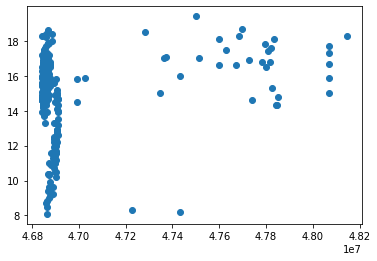

In [39]:
x_axis = students_df['CSP Approx Enrollment Age']
y_axis = students_df['']
plt.scatter(x_axis,y_axis)